# Uptime Plots
Note: Raw cells are for code I decide to not use
## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
dfv = pd.read_csv('UrbanCanyonV.csv')
dfv_roof = dfv.query('Rover == "JudoRoof"')
dfv_court = dfv.query('Rover != "JudoRoof"')

dfh = pd.read_csv('UrbanCanyonH.csv')
dfh_roof = dfh.query('Rover == "JudoRoof"')
dfh_court = dfh.query('Rover != "JudoRoof"')

dfv

Date  Base     Rover Signal    Fine  Medium  Coarse
0    115  WCOB  JudoRoof    PRI  100.00  100.00  100.00
1    116  WCOB  JudoRoof    PRI  100.00  100.00  100.00
2    115  WCOB  JudoRoof    SEC  100.00  100.00  100.00
3    116  WCOB  JudoRoof    SEC  100.00  100.00  100.00
4    115  WCOB  JudoRoof   VSBL   99.99   99.99   99.99
5    116  WCOB  JudoRoof   VSBL   99.99   99.99   99.99
6    115  WCOB     P4_03    PRI   98.10   99.92  100.00
7    116  WCOB     P4_03    PRI   99.79  100.00  100.00
8    117  WCOB     P4_03    PRI   95.71   99.95  100.00
9    115  WCOB     P4_03    SEC   98.67   99.76  100.00
10   116  WCOB     P4_03    SEC   99.41  100.00  100.00
11   117  WCOB     P4_03    SEC   98.63  100.00  100.00
12   115  WCOB     P4_03   VSBL   88.46   98.03   99.97
13   116  WCOB     P4_03   VSBL   89.91   99.91   99.99
14   117  WCOB     P4_03   VSBL   72.32   99.14   99.98
15   115  WCOB     P4_05    PRI   98.72   99.78  100.00
16   116  WCOB     P4_05    PRI   99.13  100.00  100.00
17   117  WCOB     P4_05    PRI   99.77  100.00  100.00
18   115  WCOB     P4_05    SEC   98.58   99.90  100.00
19   116  WCOB     P4_05    SEC   98.98   99.99  100.00
20   117  WCOB     P4_05    SEC   99.92  100.00  100.00
21   115  WCOB     P4_05   VSBL   81.06   97.05   99.98
22   116  WCOB     P4_05   VSBL   89.00   99.80   99.99
23   117  WCOB     P4_05   VSBL   95.54   99.68   99.98

# Unused Code

# Uptime Plots

In [41]:
def uptime_plot(df, level, ax, title):
    #df.groupby(['Date','Rover', 'Signal'])[['Fine', 'Medium', 'Coarse']] \
    df.groupby(['Date','Rover', 'Signal'])[level] \
        .sum().plot(kind='barh', subplots=False, color=['c', 'c', 'b'], ax=ax)
    ax.set_xlim([70, 100])
    ax.set_xlabel('Availability (%)')
    ax.set_title(f'{title} {level}')
    plt.tight_layout()

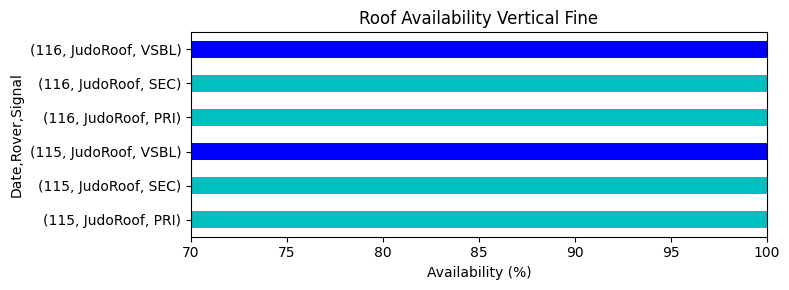

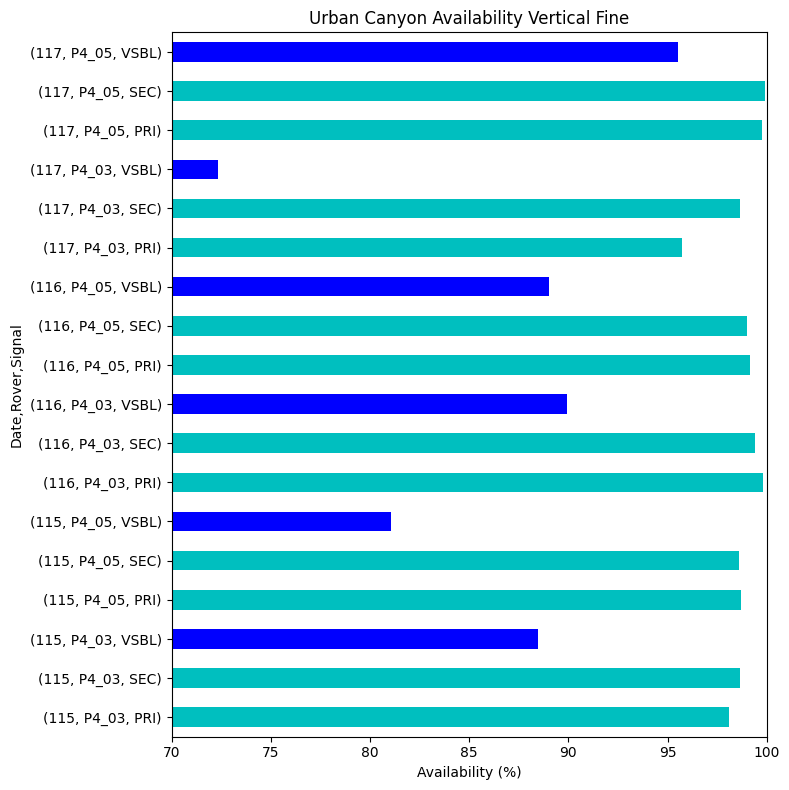

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
uptime_plot(dfv_roof, 'Fine', ax, 'Roof Availability Vertical')
fig.savefig('availability_roof_v.png')

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
uptime_plot(dfv_court, 'Fine', ax, 'Urban Canyon Availability Vertical')
fig.savefig('availability_court_v.png')

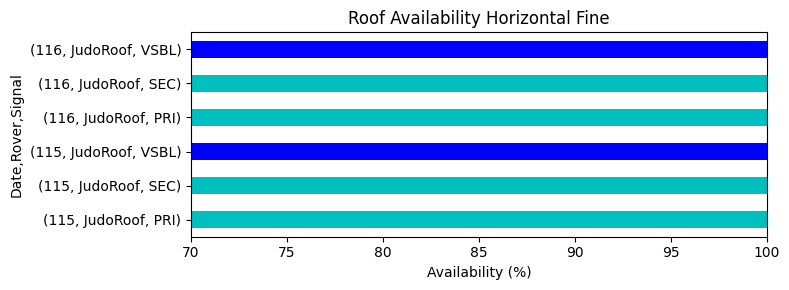

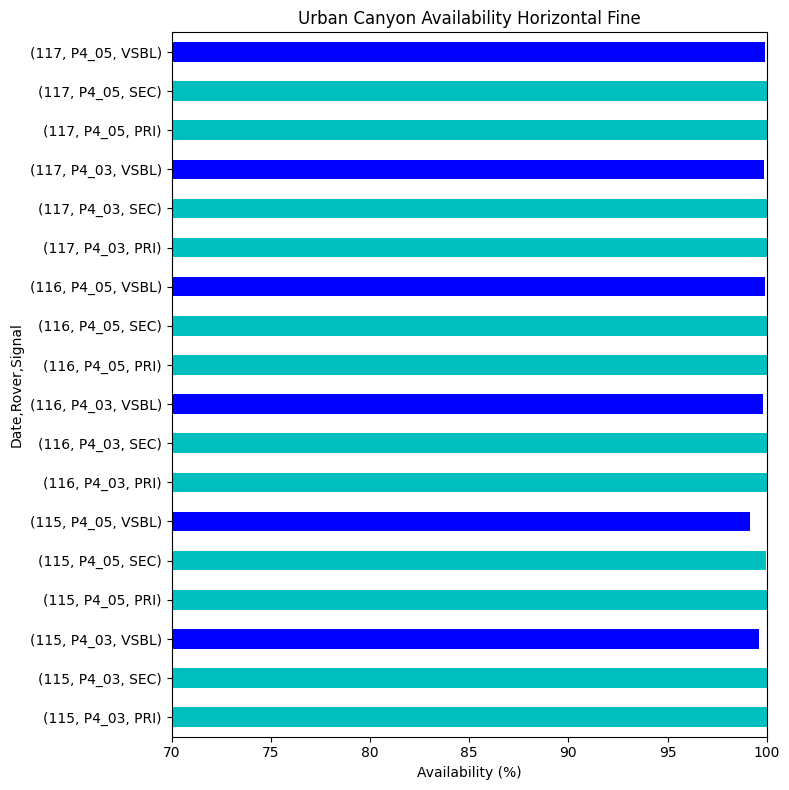

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
uptime_plot(dfh_roof, 'Fine', ax, 'Roof Availability Horizontal')
fig.savefig('availability_roof_h.png')

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
uptime_plot(dfh_court, 'Fine', ax, 'Urban Canyon Availability Horizontal')
fig.savefig('availability_court_h.png')

## Means

In [54]:
display(dfh_court.groupby('Signal').Fine.mean())
display(dfv_court.groupby('Signal').Fine.mean())

Signal
PRI     100.000
SEC      99.995
VSBL     99.715
Name: Fine, dtype: float64

Signal
PRI     98.536667
SEC     99.031667
VSBL    86.048333
Name: Fine, dtype: float64

# Hyundai

In [36]:
df_hundai = pd.read_csv('Hyundai-Combined.csv')
dfh_h = df_hundai.query('Orientation == "Horizontal"').drop(['Orientation'], axis=1)
dfh_v = df_hundai.query('Orientation == "Vertical"').drop(['Orientation'], axis=1)

In [37]:
dfh_v

Location          Rover Signal    Fine  Medium  Coarse
12  StaticPosition1        JudoCab    PRI   81.49  100.00  100.00
13  StaticPosition1   JudoLeftMast    PRI  100.00  100.00  100.00
14  StaticPosition1  JudoRightMast    PRI  100.00  100.00  100.00
15  StaticPosition1        SDBX992    PRI  100.00  100.00  100.00
16  StaticPosition1        JudoCab    SEC  100.00  100.00  100.00
17  StaticPosition1   JudoLeftMast    SEC  100.00  100.00  100.00
18  StaticPosition1  JudoRightMast    SEC   99.59  100.00  100.00
19  StaticPosition1        SDBX992    SEC  100.00  100.00  100.00
20  StaticPosition1        JudoCab   VSBL   99.21   99.99   99.99
21  StaticPosition1   JudoLeftMast   VSBL   99.99   99.99   99.99
22  StaticPosition1  JudoRightMast   VSBL   93.53   99.97   99.99
23  StaticPosition1        SDBX992   VSBL   99.99   99.99   99.99
36  StaticPosition2        JudoCab    PRI   98.26  100.00  100.00
37  StaticPosition2   JudoLeftMast    PRI  100.00  100.00  100.00
38  StaticPosition2  JudoRightMast    PRI  100.00  100.00  100.00
39  StaticPosition2        SDBX992    PRI  100.00  100.00  100.00
40  StaticPosition2        JudoCab    SEC  100.00  100.00  100.00
41  StaticPosition2   JudoLeftMast    SEC   99.92  100.00  100.00
42  StaticPosition2  JudoRightMast    SEC  100.00  100.00  100.00
43  StaticPosition2        SDBX992    SEC  100.00  100.00  100.00
44  StaticPosition2        JudoCab   VSBL   98.78   99.99   99.99
45  StaticPosition2   JudoLeftMast   VSBL   99.87   99.99   99.99
46  StaticPosition2  JudoRightMast   VSBL   94.24   99.99   99.99
47  StaticPosition2        SDBX992   VSBL   99.99   99.99   99.99
60  StaticPosition3        JudoCab    PRI  100.00  100.00  100.00
61  StaticPosition3   JudoLeftMast    PRI   99.18  100.00  100.00
62  StaticPosition3  JudoRightMast    PRI  100.00  100.00  100.00
63  StaticPosition3        SDBX992    PRI  100.00  100.00  100.00
64  StaticPosition3        JudoCab    SEC   96.79  100.00  100.00
65  StaticPosition3   JudoLeftMast    SEC  100.00  100.00  100.00
66  StaticPosition3  JudoRightMast    SEC  100.00  100.00  100.00
67  StaticPosition3        SDBX992    SEC  100.00  100.00  100.00
68  StaticPosition3        JudoCab   VSBL   99.12   99.99   99.99
69  StaticPosition3   JudoLeftMast   VSBL   98.63   99.99   99.99
70  StaticPosition3  JudoRightMast   VSBL   98.74   99.98   99.98
71  StaticPosition3        SDBX992   VSBL   99.81   99.99   99.99

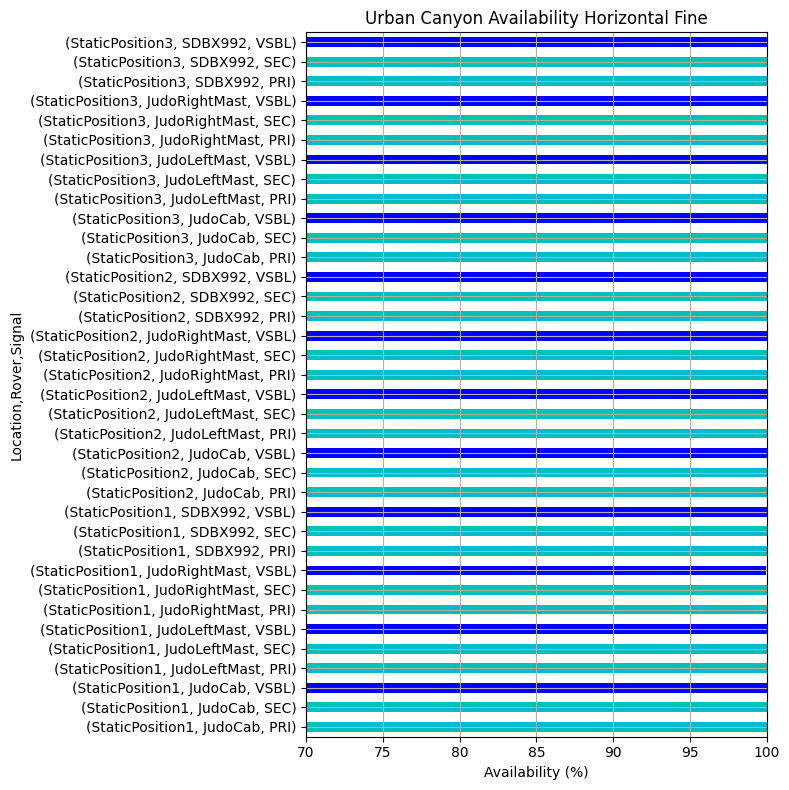

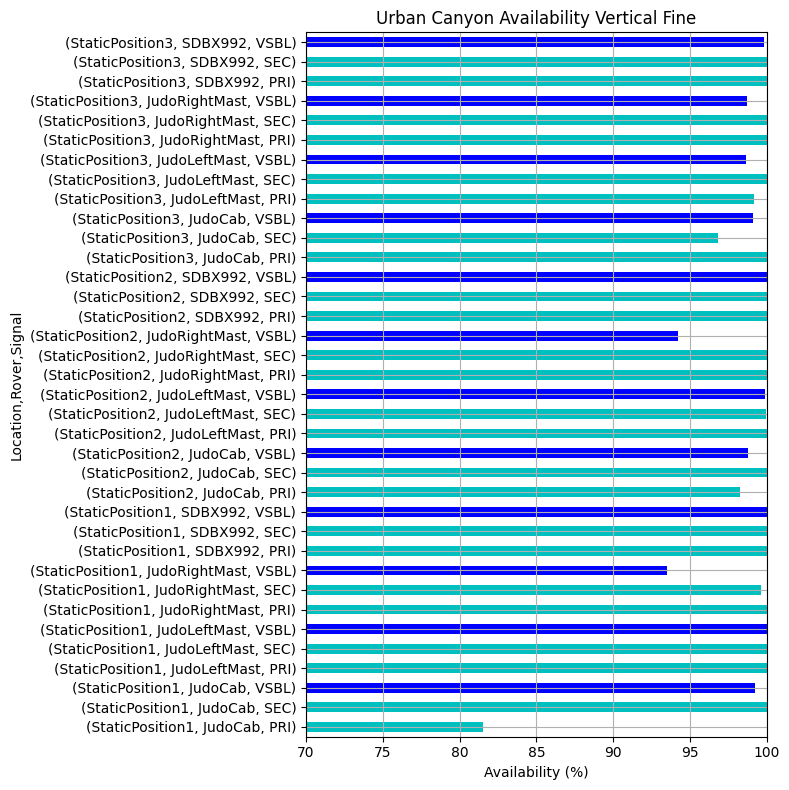

In [46]:
def h_uptime_plot(df, level, ax, title):
    
    df.groupby(['Location','Rover', 'Signal'])[level] \
        .sum().plot(kind='barh', subplots=False, color=['c', 'c', 'b'], ax=ax)
    ax.set_xlim([70, 100])
    ax.set_xlabel('Availability (%)')
    ax.set_title(f'{title} {level}')
    ax.grid(True)
    plt.tight_layout()

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
h_uptime_plot(dfh_h, 'Fine', ax, 'Urban Canyon Availability Horizontal')
fig.savefig('availability_hundai_h.png')

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
h_uptime_plot(dfh_v, 'Fine', ax, 'Urban Canyon Availability Vertical')
fig.savefig('availability_hundai_v.png')

In [51]:
dfh_v.groupby('Signal').Fine.mean()

Signal
PRI     98.244167
SEC     99.691667
VSBL    98.491667
Name: Fine, dtype: float64

In [52]:
dfh_h.groupby('Signal').Fine.mean()

Signal
PRI     100.000000
SEC      99.998333
VSBL     99.985833
Name: Fine, dtype: float64